In [1]:
pwd

'C:\\Users\\user\\OneDrive\\Desktop\\scatter-plotter\\Datacamp'

In [2]:
cd C:\\Users\\user\\OneDrive\\Desktop\\CSV files

C:\Users\user\OneDrive\Desktop\CSV files


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns


In [4]:
data = pd.read_csv('Automobile_data.csv')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [5]:
data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [6]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [7]:
data.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

cleaning the normalize column

In [8]:
# Find out number of records having '?' value for normalized losses
data['normalized-losses'].loc[data['normalized-losses'] == '?'].count()

41

In [9]:
# Setting the missing value to mean of normalized losses and convert the datatype to integer
nl = data['normalized-losses'].loc[data['normalized-losses'] != '?']
nlmean = nl.astype(str).astype(int).mean()
data['normalized-losses'] = data['normalized-losses'].replace('?',nlmean).astype(int)
data['normalized-losses'].head()

0    122
1    122
2    122
3    164
4    164
Name: normalized-losses, dtype: int32

In [10]:
# cleaning the price data
# Find out the number of values which are not numeric
data['price'].str.isnumeric().value_counts()

True     201
False      4
Name: price, dtype: int64

In [11]:
data['price'].loc[data['price'].str.isnumeric() == False]


9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object

In [12]:
#Setting the missing value to mean of price and convert the datatype to integer
price = data['price'].loc[data['price'] != '?']
pmean = price.astype(str).astype(int).mean()
data['price'] = data['price'].replace('?',pmean).astype(int)
data['price'].head()

0    13495
1    16500
2    16500
3    13950
4    17450
Name: price, dtype: int32

In [13]:
# cleaning the horsepower

In [14]:
data['horsepower'].str.isnumeric().value_counts()
horsepower = data['horsepower'].loc[data['horsepower'] != '?']
hpmean = horsepower.astype(str).astype(int).mean()
data['horsepower'] = data['horsepower'].replace('?',pmean).astype(int)

In [15]:
data.loc[data['horsepower'] > 10000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,122,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,13207,?,23,31,9295
131,2,122,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,13207,?,23,31,9895


In [16]:
# cleaning bore
data['bore'].loc[data['bore'] == '?']

55    ?
56    ?
57    ?
58    ?
Name: bore, dtype: object

In [17]:
# Replace the non-numeric value to null and convert the datatype
data['bore'] = pd.to_numeric(data['bore'],errors='coerce')
data.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke                object
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [18]:
# Replace the non-number value to null and convert the datatype
data['stroke'] = pd.to_numeric(data['stroke'],errors='coerce')
data.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [19]:
# cleaning the peak-rm
data['peak-rpm'] = pd.to_numeric(data['peak-rpm'],errors='coerce')
data.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int32
dtype: object

In [20]:
# univariate analysis


In [21]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Make')

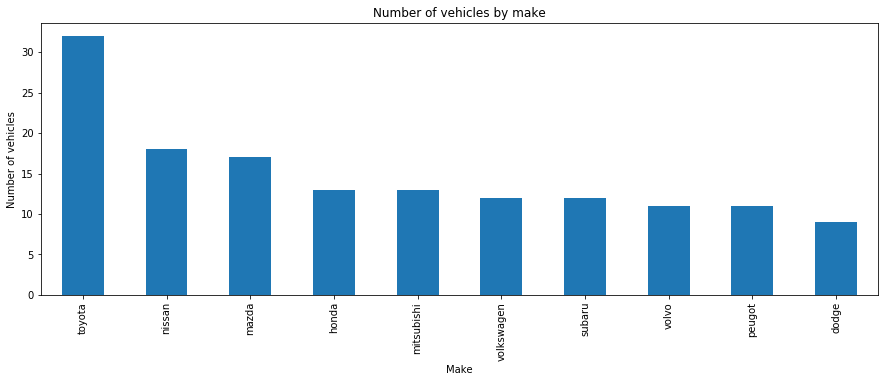

In [22]:
data.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make')

Text(0.5, 0, 'Risk rating')

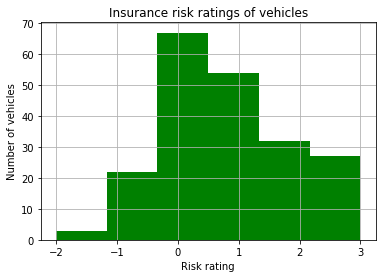

In [23]:
data.symboling.hist(bins=6,color='green');
plt.title("Insurance risk ratings of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Risk rating')

Text(0.5, 1.0, 'make vs count vs fuel type of vehicles')

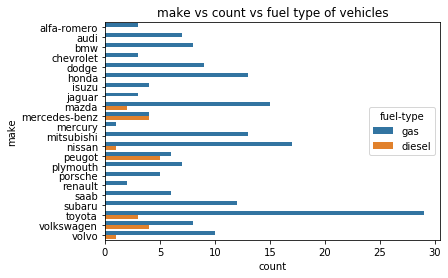

In [27]:
sns.countplot(y="make",hue = 'fuel-type',
data=data)
plt.title("make vs count vs fuel type of vehicles")


Text(0.5, 0, 'Normalized losses')

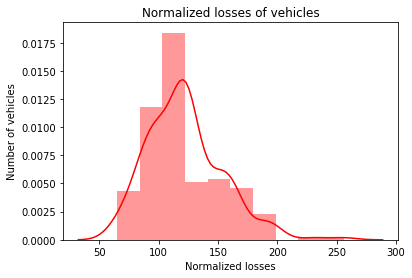

In [26]:
sns.distplot(data['normalized-losses'], kde=True, color='red', bins=10)
plt.title("Normalized losses of vehicles")
plt.ylabel('Number of vehicles')
plt.xlabel('Normalized losses')